In [272]:
import torch 

In [273]:
import torch.nn as nn
class LSTM(nn.Module):
    
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.num_classes = num_classes # output size
        self.num_layers = num_layers # number of recurrent layers in the lstm
        self.input_size = input_size # input size
        self.hidden_size = hidden_size # neurons in each lstm layer
        # LSTM model
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=0.2) # lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) # fully connected 
        self.fc_2 = nn.Linear(128, num_classes) # fully connected last layer
        self.relu = nn.ReLU()
        
    def forward(self,x):
        # hidden state
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # cell state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # (input, hidden, and internal state)
        print(output)
        hn = hn.view(-1, self.hidden_size) # reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) # first dense
        out = self.relu(out) # relu
        out = self.fc_2(out) # final output
        return out

In [274]:
input_size = 4 # number of features
hidden_size = 2 # number of features in hidden state
num_layers = 1 # number of stacked lstm layers

num_classes = 50 # number of output classes 

model = LSTM(num_classes, input_size, hidden_size, num_layers)
model = torch.load("ETH.pt")

/home/morpheus/.local/lib/python3.8/site-packages/torch/nn/modules/rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [275]:
import yfinance as yf
msft = yf.Ticker("ETH-USD")
df = msft.history(period="500d",interval="1d")
df = df[:100]
print(len(df))

100


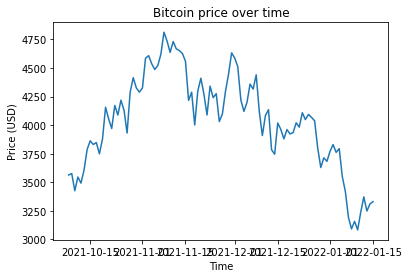

In [276]:
import matplotlib.pyplot as plt
plt.plot(df.Close)
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.title("Bitcoin price over time")
plt.show();

In [277]:
df = df.drop(['Dividends','Stock Splits'], axis=1)
X,y = df.drop('Close',axis=1),df.Close.values 

In [278]:
X.shape,y.shape

((100, 4), (100,))

In [279]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()
X_trans = ss.fit_transform(X)
y_trans = mm.fit_transform(y.reshape(-1, 1))

In [280]:
import numpy as np
# split a multivariate sequence past, future samples (X and y)
def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out):
    X, y = list(), list() # instantiate X and y
    for i in range(len(input_sequences)):
        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(input_sequences): break
        # gather input and output of the pattern
        seq_x, seq_y = input_sequences[i:end_ix], output_sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x), y.append(seq_y)
    return np.array(X), np.array(y)

X_ss, y_mm = split_sequences(X_trans, y_trans, 100, 50)
print(X_ss.shape, y_mm.shape)

(0,) (0,)


In [281]:
import torch
from torch.autograd import Variable
# X_tensors = Variable(torch.Tensor(X_ss))
# y_tensors = Variable(torch.Tensor(y_mm))
X_tensors 

In [286]:
X_tensors_final = torch.reshape(X_tensors,   
                                      (X_tensors.shape[0], 100, 
                                       X_tensors.shape[2]))
# print("Shape: ", X_tensors_final.shape, y_test)

IndexError: tuple index out of range

In [ ]:
import matplotlib.pyplot as plt
predict = model(X_tensors_final[-1].unsqueeze(0))
predict = predict.detach().numpy()
predict = mm.inverse_transform(predict)
predict = predict[0].tolist()

target = y_tensors[-1].detach().numpy() # last sample again
target = mm.inverse_transform(target.reshape(1, -1))
target = target[0].tolist()
plt.plot(target, label="Actual Data")
plt.plot(predict, label="LSTM Predictions")
plt.show();

In [ ]:
print(predict)